In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pysta
import stc

import os

%load_ext autoreload
%autoreload 2

# run for all cells (OFF LINE)

run 
```
python3 sta_batch.py [DATASET] --tap 8
```

datasets
* 20180618
* 20180621
* 20180626
* 20180828

## load stim and spike data

In [2]:
folder_name = "data"

#dataset_name = "20180618"
#dataset_name = "20180621"
dataset_name = "20180626"
# dataset_name = "20180828"

stim, spike_train, info = pysta.load_data(dataset_name, folder_name)

# channel_names = [ch.replace("ch_","") for ch in info["channel_names"]]   # NOT NEEDED ANYMORE
# info["channel_names"]
# info["cell_types"]


['dataset_name', 'stim', 'spike_train', 'info']
(64, 9000)
(156, 9000)
{'channel_names': ['12a', '12b', '12c', '13a', '13b', '13c', '13d', '13e', '14a', '14b', '14c', '14d', '16a', '16b', '16c', '17a', '17b', '17c', '17d', '21a', '21b', '21c', '21d', '21e', '22a', '22b', '23a', '23b', '23c', '23d', '25a', '25b', '25c', '26a', '26b', '26c', '26d', '27a', '27b', '27c', '27d', '28a', '28b', '28c', '31a', '31b', '31c', '31d', '32a', '32b', '32c', '33a', '33b', '33c', '33d', '35a', '35b', '35c', '35d', '35e', '35f', '35g', '36a', '36b', '36c', '36d', '37a', '37b', '37c', '37d', '37e', '38a', '41a', '41b', '41c', '41d', '42a', '42b', '42c', '43a', '43b', '43c', '45a', '45b', '45c', '46a', '46b', '47a', '48a', '48b', '48c', '48d', '48e', '51a', '51b', '53a', '53b', '53c', '53d', '54a', '54b', '54c', '54d', '56a', '56b', '58a', '61a', '61b', '62a', '62b', '63a', '63b', '63c', '63d', '63e', '64a', '65a', '65b', '65c', '68a', '68b', '71a', '71b', '71c', '72a', '72b', '72c', '72d', '72e', '73a', 

## read some statistics of sta



In [35]:
tap = 8
folder_name = "{}_tap{}_sta".format(dataset_name, tap)
sta_result = pd.read_csv(os.path.join(folder_name, "stat.csv"))

# subtract center from min,max
sta_result["min"] -= 0.5
sta_result["max"] -= 0.5

# calc polarity
pos = np.abs(sta_result["max"])
neg = np.abs(sta_result["min"])
#sta_result["polarity"] = (pos - neg) / np.sqrt(pos) / np.sqrt(neg)
# sta_result["polarity"] = (pos - neg) / np.minimum(pos, neg)
sta_result["polarity"] = np.maximum(pos, neg) / np.minimum(pos, neg) * np.sign(pos-neg)

# calc d_prime
sta_result["d_prime"] = (sta_result["max"] - sta_result["min"]) / sta_result["sigma"]


# add cell type (from PSTH)
sta_result["cell_type"] = info["cell_types"]
sta_result.to_csv(os.path.join(folder_name, "analysis.csv"), index=None)

sta_result

,channel_name,num_samples,num_spikes,min,max,sigma,polarity,d_prime,cell_type
0,12a,2868,4173,-0.197819,0.104361,0.019981,-1.895522,15.123475,unknown
1,12b,1123,1239,-0.286118,0.203793,0.026305,-1.403960,18.624368,OFF
2,12c,80,80,-0.337500,0.262500,0.062627,-1.285714,9.580539,unknown
3,13a,6610,8830,-0.101359,0.082220,0.011100,-1.232782,16.538420,unknown
4,13b,648,998,-0.366733,0.222445,0.034582,-1.648649,17.037106,unknown
...,...,...,...,...,...,...,...,...,...
151,86c,526,705,-0.073050,0.203546,0.027016,2.786408,10.238226,unknown
152,86d,149,151,-0.175497,0.228477,0.046548,1.301887,8.678597,unknown
153,87a,3872,9120,-0.386513,0.216118,0.027801,-1.788432,21.676952,ON/OFF
154,87b,3512,3797,-0.076508,0.244799,0.019283,3.199656,16.662341,unknown


Text(0, 0.5, 'count')

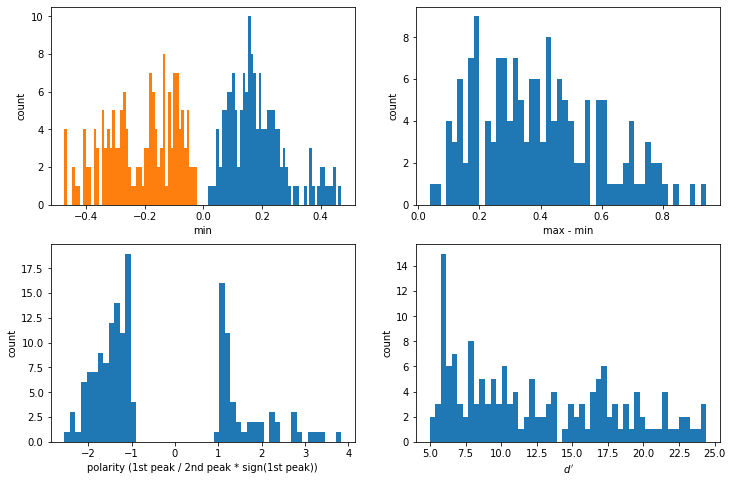

In [38]:
num_bins = 50
plt.figure(figsize=(12,8))

plt.subplot(221)
plt.hist(sta_result["max"], num_bins)
plt.xlabel("max or min")
plt.ylabel("count")

# plt.subplot(222)
plt.hist(sta_result["min"], num_bins)
plt.xlabel("min")
plt.ylabel("count")

plt.subplot(222)
plt.hist(sta_result["max"] - sta_result["min"], num_bins)
plt.xlabel("max - min")
plt.ylabel("count")


plt.subplot(223)
plt.hist(sta_result["polarity"], num_bins)
plt.xlabel("polarity (1st peak / 2nd peak * sign(1st peak))")
plt.ylabel("count")
plt.subplot(224)
plt.hist(sta_result["d_prime"], num_bins)
plt.xlabel("$d'$")
plt.ylabel("count")

## plot some examples

,channel_name,num_samples,num_spikes,min,max,sigma,polarity,d_prime,cell_type
154,87b,3512,3797,-0.076508,0.244799,0.019283,3.199656,16.662341,unknown


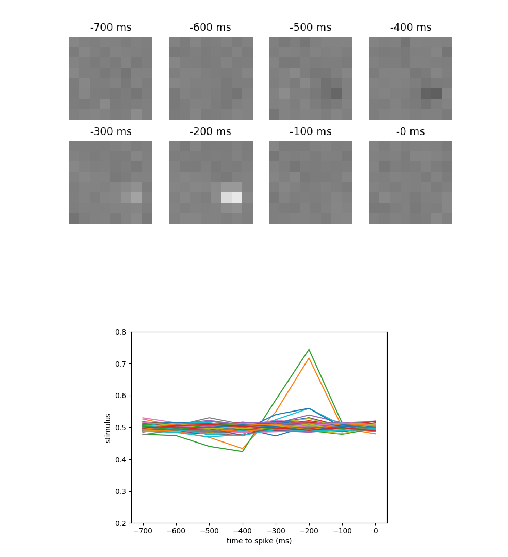

In [7]:

#channel_name = "14b"
# channel_name = "36c"
channel_name = "87b"

plt.figure(figsize=(12,10))

plt.subplot(211)
plt.imshow(plt.imread("{}_tap8_sta/{}_sta.png".format(dataset_name, channel_name)))
plt.axis("off")

plt.subplot(212)
plt.imshow(plt.imread("{}_tap8_sta/{}_sta_temp.png".format(dataset_name, channel_name)))
plt.axis("off")

idx = sta_result["channel_name"] == channel_name
sta_result.loc[idx,:]